In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
import seaborn as sns
import math

In [232]:
data = pd.read_csv('customer_data.csv')

In [233]:
data.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


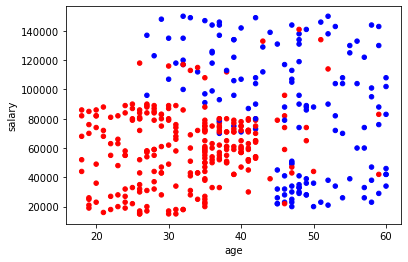

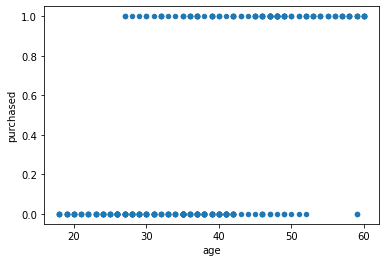

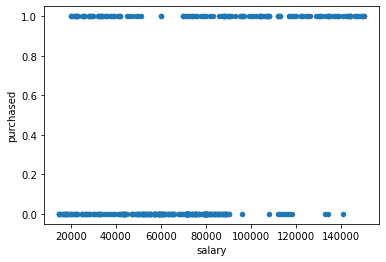

In [234]:
getColor = lambda x: 'red' if x == 0 else 'blue'
color = list(map(getColor, data['purchased']))

data.plot(kind='scatter', x='age', y='salary', c=color)
plot.show()

data.plot(kind='scatter', x='age', y='purchased')
plot.show()

data.plot(kind='scatter', x='salary', y='purchased')
plot.show()

In [240]:
x = data.drop(columns = ['purchased']).to_numpy().reshape((-1,2))
y = data['purchased'].to_numpy()

x_train = x[0:320]
y_train = y[0:320]
x_test = x[320:]
y_test = y[320:]

In [244]:
x_train


array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [245]:
# UNQ_C1
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [246]:
sigmoid(0)

0.5

In [247]:
def compute_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    return total_cost

In [248]:
m, n = x_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [252]:
test_w = np.array([0.2, 0.2])
test_b = 0.5

cost = compute_cost(x_train , y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


Cost at test w,b: nan


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11992/2726446783.py:7: RuntimeWarning: divide by zero encountered in log
  cost += -y[i] * np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11992/2726446783.py:7: RuntimeWarning: invalid value encountered in multiply
  cost += -y[i] * np.log(f_wb) - (1-y[i])*np.log(1-f_wb)


In [253]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw

In [254]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # number of training examples
    m = len(X)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.apend(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

AttributeError: 'float' object has no attribute 'shape'

In [256]:

def predict(X, w, b): 
   
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p